In [97]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_excel('../data/US Higher Education_ Value vs. Vulnerability.xlsx', skiprows=5)

In [140]:
clemson = data[data['Institution Name']=='Clemson University']

In [161]:
research_unis = data[data['Ranking List']=='USN National University Ranking']
liberal_arts  = data[data['Ranking List']=='USN National College Ranking']
furman        = data[data['Institution Name']=='Furman University']

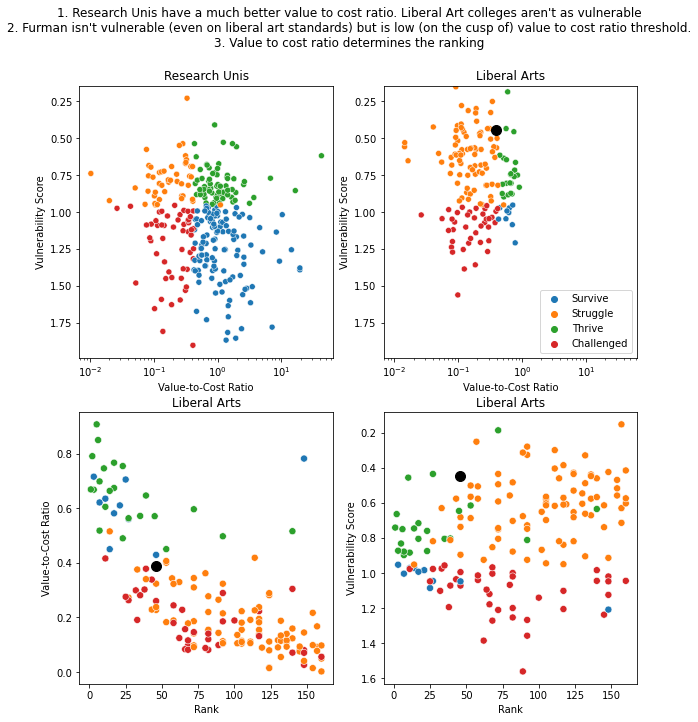

In [156]:

categories = [ 'Survive','Struggle', 'Thrive', 'Challenged']
hue_order  = [ 'Survive','Struggle', 'Thrive', 'Challenged']

fig, axs = plt.subplots(2, 2, figsize=(10, 11))

sns.scatterplot(data=research_unis, x='Value-to-Cost Ratio', y='Vulnerability Score',\
                hue='Prof G Categorization', ax=axs[0][0], hue_order=hue_order, legend=False)

sns.scatterplot(data=liberal_arts, x='Value-to-Cost Ratio', y='Vulnerability Score',\
                hue='Prof G Categorization', ax=axs[0][1], hue_order=hue_order)

sns.scatterplot(data=liberal_arts, x='Rank', y='Value-to-Cost Ratio', \
                hue='Prof G Categorization', ax=axs[1][0], s=50, hue_order=hue_order, legend=False);

sns.scatterplot(data=liberal_arts, x='Rank', y='Vulnerability Score', \
                hue='Prof G Categorization', ax=axs[1][1], s=50, hue_order=hue_order, legend=False);

axs[0][1].scatter(furman['Value-to-Cost Ratio'], furman['Vulnerability Score'], color='black', s=100);
axs[1][0].scatter(furman['Rank'], furman['Value-to-Cost Ratio'], color='black', s=100);
axs[1][1].scatter(furman['Rank'], furman['Vulnerability Score'], color='black', s=100);

axs[0][0].set_title('Research Unis')
axs[0][1].set_title('Liberal Arts')
axs[1][0].set_title('Liberal Arts')
axs[1][1].set_title('Liberal Arts')

axs[0][0].invert_yaxis()
axs[0][1].invert_yaxis()
axs[1][1].invert_yaxis()

axs[0][0].set_xscale('log');
axs[0][1].set_xscale('log');
axs[0][1].set_xlim(axs[0][0].get_xlim());
axs[0][1].set_ylim(axs[0][0].get_ylim());

axs[0][1].legend(loc='lower right')

plt.suptitle("1. Research Unis have a much better value to cost ratio. Liberal Art colleges aren't as vulnerable\n"+\
             "2. Furman isn't vulnerable (even on liberal art standards) but is low (on the cusp of) value to cost ratio threshold.\n"+
             "3. Value to cost ratio determines the ranking");

In [158]:
data = data[data['Ranking List']=='USN National College Ranking']

In [165]:
corrs = data.corr('spearman')

In [167]:
abs(corrs['Rank']).sort_values(ascending=False)

Rank Pct Rank                                         1.000000
Rank                                                  1.000000
Value\n(C x E x E)                                    0.879776
Credential Score                                      0.878681
Average Undergraduate Tuition & Fees Score            0.788571
Average Undergraduate Tuition and Fees                0.788571
Endowment per Full Time Student                       0.783034
Endowment per Full Time Student Pct Rank              0.783034
Instructional Wages per Full-Time Student             0.780069
Instructional Wages per Full-Time Student PCT Rank    0.780069
Value-to-Cost Ratio                                   0.742229
Education Score                                       0.724312
Undergraduate Admit Rate Pct Rank                     0.721376
Undergraduate Admit Rate                              0.721376
Percentage of International Students PCT Rank         0.647641
Percentage of International Students                  0

In [22]:
furman = data[data['Institution Name']=='Furman University']

In [35]:
top = data[(data['Rank']>35) & (data['Rank']<46)]

In [54]:
result = pd.concat([top.mean(), furman.mean(), top.mean()<furman.mean()], axis=1)

/var/folders/wr/7qh9khyj6jn43plznhyqlm5h0000gn/T/ipykernel_61028/3093574785.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  result = pd.concat([top.mean(), furman.mean(), top.mean()<furman.mean()], axis=1)


In [55]:
result.columns = ['10 above', 'Furman', 'Furman better']

In [57]:
result[result['Furman better']==False]

,10 above,Furman,Furman better
Rank Pct Rank,0.826857,0.807000,False
Undergraduate Admit Rate Pct Rank,0.773143,0.569000,False
Credential Score,2.043143,1.917000,False
15-Year NPV,296571.428571,265000.000000,False
15-Year NPV PCT Rank,0.519857,0.379000,False
30-Year NPV,835714.285714,763000.000000,False
30-Year NPV PCT Rank,0.580571,0.497000,False
Instructional Wages per Full-Time Student,14612.860504,10163.000000,False
Instructional Wages per Full-Time Student PCT Rank,0.752286,0.619000,False
Education Score,1.852714,1.495000,False


# Results

Pomona College


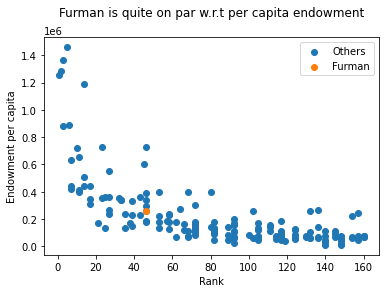

In [77]:
plt.scatter(data['Rank'], data['Endowment per Full Time Student'])
plt.scatter(furman['Rank'], furman['Endowment per Full Time Student'])
plt.legend(['Others', 'Furman']);
plt.title('Furman is quite on par w.r.t per capita endowment\n');
plt.xlabel('Rank');
plt.ylabel('Endowment per capita');

print(data.iloc[data['Endowment per Full Time Student'].argmax()]['Institution Name']);

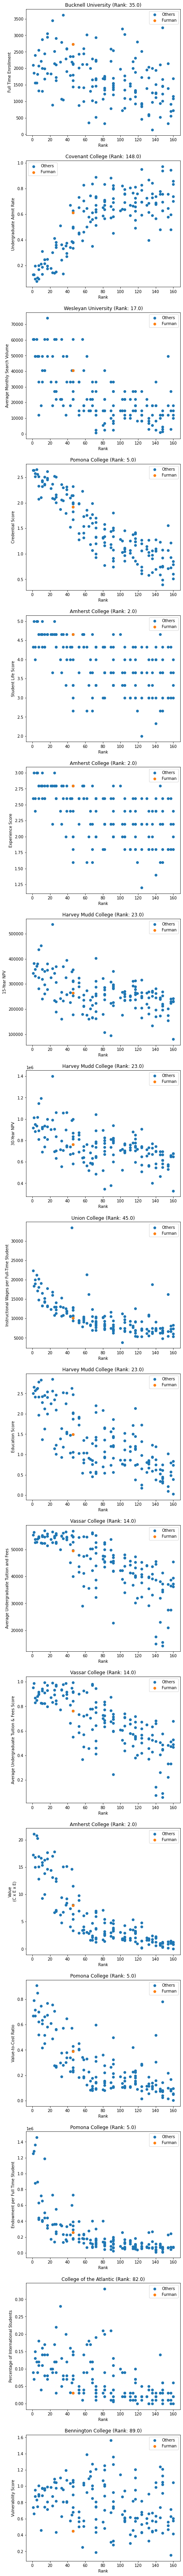

In [105]:
vars_ = data.columns[(data.dtypes=='float64')]
vars_ = [var for var in vars_ if var.lower().endswith('pct rank')==False]
vars_.remove('Rank')

fig, axs = plt.subplots(len(vars_), 1, figsize=(7, len(vars_)*7))
for i, var in enumerate(vars_):
    axs[i].scatter(data['Rank'], data[var])
    axs[i].scatter(furman['Rank'], furman[var])
    axs[i].legend(['Others', 'Furman']);
    axs[i].set_xlabel('Rank');
    axs[i].set_ylabel(var);

    top = data.iloc[data[var].argmax()]
    axs[i].set_title("Top: %s (Rank: %s)" % (top['Institution Name'], top['Rank']));